<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/Tensorflow_Fast_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Other imports
import PIL.Image

### We are going to be using the tensorflow article on [Neural Style Transfer](https://www.tensorflow.org/tutorials/generative/style_transfer)

In [2]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

204800/195196 [===============================] - 0s 0us/step


In [3]:
# funtion that changes the tensor into an image
def tensor_to_image(tensor):
  tensor = tensor * 255 # Since the image values will be in between 0 and 1, this will rescale them to be in between 0 and 255
  tensor = np.array(tensor, dtype = np.uint8) # Changes the tensor into numpy array
  if np.ndim(tensor) > 3: # If the shape is (1, H, W, 3)
    assert tensor.shape[0] == 1 # It is checking if the 0th index is (1st shape) is equal to one, if false, it will throw and AssertionError
    tensor = tensor[0] # If true, it will make the entire tensor just the first index and not the second index

  return PIL.Image.fromarray(tensor) # Returns the array object (tensor) as an image object to plot


#### Example of `if np.ndim(tensor) > 3` 

In [4]:
tensor = np.array(([[[[1,2,3], [1,2,3], [1,2,3]],
                    [[1,2,3], [1,2,3], [1,2,3]],
                    [[1,2,3], [1,2,3], [1,2,3]],
                    [[1,2,3], [1,2,3], [1,2,3]]]]))
tensor = tensor[0]

In [5]:
tensor.shape

(4, 3, 3)

In [6]:
tensor

array([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]])

In [7]:
if np.ndim(tensor) > 3:
  assert tensor.shape[0] == 1
  tensor = tensor[0]

  PIL.Image.fromarray(tensor) # not right type

In [8]:
tensor_to_image(tensor)

In [9]:
tensor.shape

(4, 3, 3)

## Getting to know the data

In [10]:
def load_img(path_to_img):
  max_dims = 512
  img = tf.io.read_file(path_to_img) # Reads the image file
  img = tf.image.decode_image(img, channels = 3, dtype = tf.float32) # Makes the image into a tensor with 3 color dims

  shape = tf.cast(tf.shape(img)[:-1], tf.float32) # Takes every dimension in the shape of the img (which looks like (H, W, 3)), so it will take the H&W and turn them into float32
  long_dim = max(shape) # Grabs the longest dimension (or maxest dimension)
  scale = max_dims / long_dim # number to mutiply to rescale img

  new_shape = tf.cast(shape * scale, tf.int32) # reshapes the H%W to be below 512 but still keeping the scale

  img = tf.image.resize(img, new_shape) # Reshapes the image to be (new_H, new_W, 3)
  img = img[tf.newaxis, :] # Adds an axis along the 0th dimension making it (1, new_H, new_W, 3)

  return img

#### Example of load_img

In [11]:
max_dims = 512
img = tf.io.read_file(content_path) # Reads the image file
img = tf.image.decode_image(img, channels = 3) #dtype = tf.float32)
img = tf.image.convert_image_dtype(img, tf.float32)

In [12]:
shape = tf.cast(tf.shape(img)[:-1], tf.float32) # Takes every dimension in the shape of the img (which looks like (H, W, 3)), so it will take the H&W and turn them into float32
long_dim = max(shape) # Grabs the longest dimension (or maxest dimension)
#scale = max / long_dim # Scale to rescale img

In [13]:
scale = max_dims  / long_dim 

In [14]:
scale

<tf.Tensor: shape=(), dtype=float32, numpy=0.73142856>

In [15]:
shape

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([577., 700.], dtype=float32)>

In [16]:
img.shape

TensorShape([577, 700, 3])

In [17]:
long_dim

<tf.Tensor: shape=(), dtype=float32, numpy=700.0>

In [18]:
512 / 700 

0.7314285714285714

In [19]:
new_shape = tf.cast(shape * scale, tf.int32)

In [20]:
new_shape

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([422, 512], dtype=int32)>

In [21]:
img = tf.image.resize(img, new_shape)

In [22]:
img.shape

TensorShape([422, 512, 3])

In [23]:
img = img[tf.newaxis, :]

In [24]:
img.shape

TensorShape([1, 422, 512, 3])

## Visualizing the Image

In [25]:
# Function to display the image
def imshow(image, title = None):
  image = tf.squeeze(image, axis = 0)

  plt.imshow(image)

  if title:
    plt.title(title)

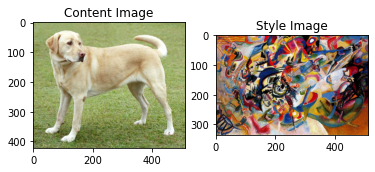

In [26]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

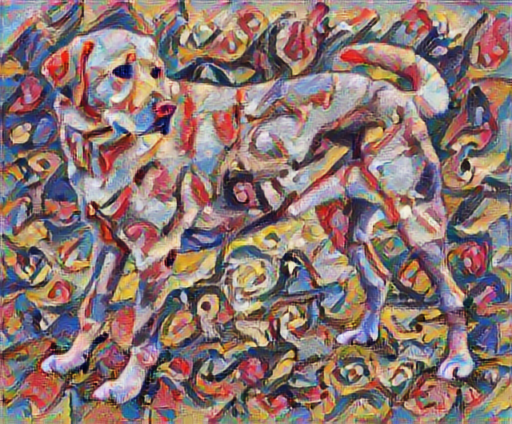

In [27]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0] # Return the fisrt part of the tensor because the tensor has 5 dimensions
tensor_to_image(stylized_image)